In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [38]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [14]:
print X[0:10]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [15]:
print y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [72]:
# Compute clustering with Means
k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [73]:
import numpy as np
from sklearn.cluster import KMeans
k_means_labels = k_means.labels_
print k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
print k_means_cluster_centers
k_means_labels_unique = np.unique(k_means_labels)
print k_means_labels_unique

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
[0 1 2]


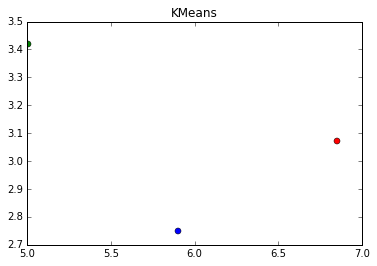

In [74]:
import pylab as pl
fig = pl.figure(1)
for center in k_means_cluster_centers:
    pl.plot(center[0], center[1], 'o')
pl.title('KMeans')
pl.show()

In [75]:
print range(3)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
print colors
print zip(range(3), colors)
for k, col in zip(range(3), colors):
    print k, col

[0, 1, 2]
['#4EACC5', '#FF9C34', '#4E9A06']
[(0, '#4EACC5'), (1, '#FF9C34'), (2, '#4E9A06')]
0 #4EACC5
1 #FF9C34
2 #4E9A06


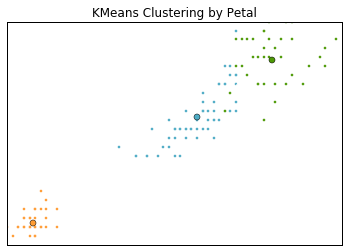

In [76]:
import pylab as pl
fig = pl.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for k, col in zip(range(3), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    pl.plot(X[my_members, 2], X[my_members, 3], 'w',
            markerfacecolor=col, marker='.')
    pl.plot(cluster_center[2], cluster_center[3], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
pl.title('KMeans Clustering by Petal')
pl.xticks(())
pl.yticks(())
pl.show()

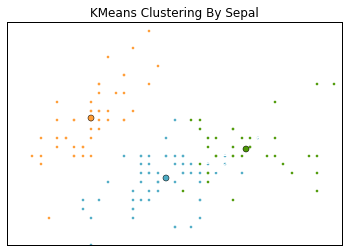

In [77]:
import pylab as pl
fig = pl.figure(1)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

for k, col in zip(range(3), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    pl.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    pl.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
pl.title('KMeans Clustering By Sepal')
pl.xticks(())
pl.yticks(())
pl.show()

In [54]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, k_means_labels)
print( "The average silhouette_score is :", silhouette_avg)

('The average silhouette_score is :', 0.5525919445213674)


In [57]:
c = cluster.KMeans(n_clusters=3)
k_data = c.fit_predict(X)
print c.inertia_

78.9408414261


In [60]:
wcss = []
for i in range(2,20):
    c = KMeans(n_clusters=i)
    k_data = c.fit_predict(X)
    wcss.append((i, c.inertia_))
    print i, c.inertia_

2 152.368706477
3 78.9408414261
4 57.3178732143
5 46.5355820513
6 38.9309630497
7 34.1906879248
8 30.274954264
9 27.8410735931
10 25.9585735931
11 24.7612567783
12 23.1101792192
13 21.6783484848
14 20.4098703323
15 18.7961897269
16 18.1221918914
17 16.8878030303
18 16.1835357143
19 15.5776092437


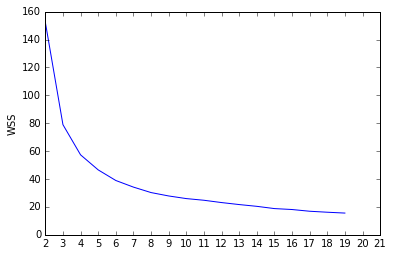

In [71]:
import matplotlib.pyplot as plt
plotary = [ele[1] for ele in wcss ]
plt.plot(plotary)
plt.ylabel('WSS')
plt.xticks(range(0,20), range(2,22))
plt.show()

In [63]:
silhouette_ary = []
for i in range(2,20):
    c = KMeans(n_clusters=i)
    c.fit(X)
    k_means_labels = c.labels_
    silhouette_avg = silhouette_score(X, k_means_labels)
    silhouette_ary.append((i, silhouette_avg))
    print i, silhouette_avg

2 0.680813620271
3 0.552591944521
4 0.497825690075
5 0.488517550854
6 0.368205696538
7 0.350875960341
8 0.357270349229
9 0.34288338431
10 0.298394015303
11 0.305308975761
12 0.291321954568
13 0.294777021566
14 0.28691681532
15 0.300306027584
16 0.309270699803
17 0.277341341915
18 0.279899807253
19 0.281839927149


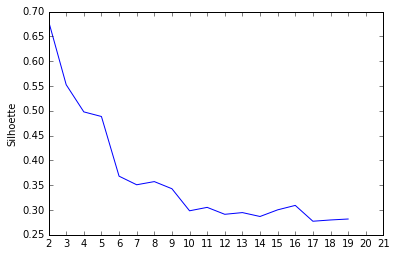

In [70]:
import matplotlib.pyplot as plt
plotary = [ele[1] for ele in silhouette_ary]
plt.plot(plotary)
plt.ylabel('Silhoette')
plt.xticks(range(0,20), range(2,22))
plt.show()

In [78]:
print X[0:10]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=True)

In [89]:
X_reduced = pca.transform(X)
print "Reduced dataset shape:", X_reduced.shape

Reduced dataset shape: (150L, 2L)


In [90]:
print X_reduced[0:10]

[[-1.31027769 -0.665813  ]
 [-1.32549971  0.34565409]
 [-1.41064601  0.27998911]
 [-1.34065489  0.63424977]
 [-1.33194435 -0.68072975]
 [-1.1129166  -1.52440999]
 [-1.37699885  0.16737608]
 [-1.28209956 -0.34738382]
 [-1.40973759  1.1636137 ]
 [-1.30521934  0.21749888]]


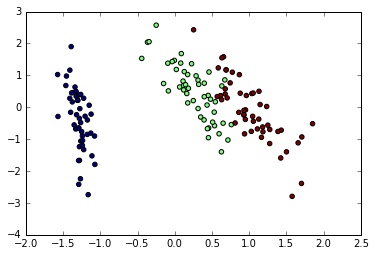

In [106]:
import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

In [105]:
print "Meaning of the 2 components:"

for component in pca.components_:
    print " + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names))

Meaning of the 2 components:
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
-0.657 x sepal length (cm) + -0.730 x sepal width (cm) + 0.176 x petal length (cm) + 0.075 x petal width (cm)


In [122]:
from sklearn.feature_extraction.text import CountVectorizer

jieba.add_word('洪智坤')
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
       '留洪智坤 柯：殘障求職不易',
       '人事處議處洪智坤　柯P：不清楚議處結果']
corpus = []
corpus.extend([' '.join(jieba.cut(ele)) for ele in ary])

vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 
for w in word:
    print w,
print 
print X.toarray()

不易 人事 今處理 公文 更新 案還 殘障 求職 洩漏 洪智坤 清楚 看到 結果 處議 議處
[[0 0 1 2 1 1 0 0 1 1 0 1 0 0 0]
 [1 0 0 0 0 0 1 1 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 1 0 1 1 1]]


In [123]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = vectorizer.fit_transform(corpus)
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()
for w in word:
    print w,
print 
print weight

不易 人事 今處理 公文 更新 案還 殘障 求職 洩漏 洪智坤 清楚 看到 結果 處議 議處
[[ 0.          0.          0.32705548  0.65411096  0.32705548  0.32705548
   0.          0.          0.32705548  0.19316423  0.          0.32705548
   0.          0.          0.        ]
 [ 0.54645401  0.          0.          0.          0.          0.
   0.54645401  0.54645401  0.          0.32274454  0.          0.          0.
   0.          0.        ]
 [ 0.          0.43238509  0.          0.          0.          0.          0.
   0.          0.          0.2553736   0.43238509  0.          0.43238509
   0.43238509  0.43238509]]


In [177]:
from xml.dom import minidom
from xml.etree import ElementTree
import jieba.analyse

with open('1435449602.xml', 'r') as f:
    events=ElementTree.fromstring(f.read())

corpus = []
ary= []
for elem in events.findall('./channel/item'):
    guid        = elem.find('guid').text
    title       = elem.find('title').text
    description = elem.find('description').text
    pubDate     = elem.find('pubDate').text
    source      = elem.find('source').text
    ary.append(title)
    corpus.append(' '.join(jieba.analyse.extract_tags(description, 20)))


In [178]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names() 

In [179]:
weight= X.toarray()

In [115]:
#for ele in word:
#    print ele, 

In [121]:
import scipy as sp

def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    print "tf", tf
    idf = sp.log(float(len(D)) / (len([doc for doc in D if t in doc])))
    print "idf", idf
    return tf * idf

a, abb, abc = ["a"], ["a", "b", "b"], ["a", "b", "c"]
D = [a, abb, abc]

print tfidf('a', a, D)
print tfidf('b', abb, D)
print tfidf('c', abc, D)

tf 1.0
idf 0.0
0.0
tf 0.666666666667
idf 0.405465108108
0.270310072072
tf 0.333333333333
idf 1.09861228867
0.366204096223


In [126]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = vectorizer.fit_transform(corpus)
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()    

In [180]:
print weight

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [181]:
from sklearn import cluster
c = cluster.KMeans(n_clusters=4)
k_data = c.fit_predict(weight)

In [188]:
for idx, clusterid in enumerate(k_data):
    if clusterid == 1:
        print idx, clusterid , ary[idx]

0 1 八仙塵爆  五相關人依公共危險重傷害法辦
1 1 八仙樂園意外 病患持續增加中
4 1 6月28日各報頭版要聞
6 1 八仙樂園舞台大火 逾400人輕重傷
11 1 八仙樂園意外 毛揆取消視察臺東行程
16 1 八仙樂園貼出暫停營業海報
21 1 八仙樂園爆炸案 專家認玉米粉危險性高應管制使用
25 1 八仙樂園粉塵燃爆 400人傷 負責人被移送
41 1 八仙案  新店慈濟4傷者危急
81 1 八仙樂園爆炸案 負責人等5人移送
86 1 八仙樂園爆炸 劣賊趁亂打劫
87 1 侯友宜探視傷者：追究責任
88 1 八仙樂園火警  國軍加入救援
89 1 八仙樂園爆炸案災害應變中心　1時30分一級開設
90 1 八仙派對彩粉釀大禍  衛福部：研議加強管理
91 1 彩色派對主辦人：風勢太大，引燃粉塵
93 1 八仙樂園大火  傷者查詢電話
95 1 派對彩粉首次釀禍  蔣丙煌：研議管理
96 1 八仙樂園火警受傷名單一覽表
97 1 00：35統計　八仙大火重傷97人、輕傷132人
98 1 衛福部長：北北基醫護人員全力動員
100 1 八仙樂園粉塵瞬燃　還原失事現場影片曝光
101 1 八仙意外毛揆取消台東熱氣球活動
102 1 八仙樂園爆炸案 士檢派3檢察官現場指揮
103 1 八仙樂園爆炸案 3檢察官展開調查
104 1 八仙爆炸案   陳國恩：全力支援
105 1 八仙大火傷患爆量  衛福調度醫院
106 1 八仙樂園意外 洪秀柱：為傷者祈福
112 1 陳國恩指示警方全力動員 協助救護交通順暢
113 1 八仙樂園爆炸228人輕重傷 朱立倫：無限期停業
117 1 八仙樂園爆炸意外 朱立倫：立即停園接受調查
118 1 北榮33名八里傷患  2/3傷重
120 1 八仙樂園塵爆215傷　朱立倫下令即刻停業
123 1 八仙樂園爆炸 朱立倫4點指示
127 1 【八仙意外】馬英九、毛治國第一時間得知　指示全
143 1 【八仙意外】讓專業的來！柯文哲指示啟動EOC
144 1 八仙水上樂園爆炸逾百人傷　三軍總醫院收治傷患


In [136]:
silhouette_ary = []
for i in range(2,20):
    c = KMeans(n_clusters=i)
    c.fit(weight)
    k_means_labels = c.labels_
    silhouette_avg = silhouette_score(weight, k_means_labels)
    silhouette_ary.append((i, silhouette_avg))
    print i, silhouette_avg

2 0.011102530233
3 0.0110025402268
4 0.00960399314333
5 0.0120554158338
6 0.0096489705159
7 0.0102714365756
8 0.0105014105795
9 0.0111362019585
10 0.00792476654808
11 0.0118931086342
12 0.0096601194094
13 0.0105644187978
14 0.0111870511065
15 0.0107679617042
16 0.0134790478592
17 0.0140221827409
18 0.0135024180734
19 0.0133491030703


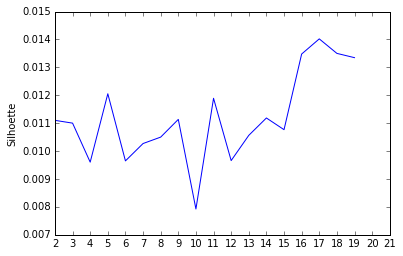

In [137]:
import matplotlib.pyplot as plt
plotary = [ele[1] for ele in silhouette_ary]
plt.plot(plotary)
plt.ylabel('Silhoette')
plt.xticks(range(0,20), range(2,22))
plt.show()

In [167]:
from sklearn import cluster
c = cluster.KMeans(n_clusters=4)
k_data = c.fit_predict(weight)


In [168]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca_data = pca.fit_transform(weight)
print pca_data.shape

(147L, 2L)


In [169]:
print pca_data[0:10]

[[-0.23662942  0.09247404]
 [-0.15525001  0.07520898]
 [ 0.0610721  -0.1347116 ]
 [ 0.03708505 -0.07860856]
 [-0.2562607   0.09336841]
 [ 0.04654335 -0.08786739]
 [-0.19423054  0.06275548]
 [ 0.02674307 -0.04670715]
 [ 0.03792933 -0.06702087]
 [ 0.09227969  0.00814375]]


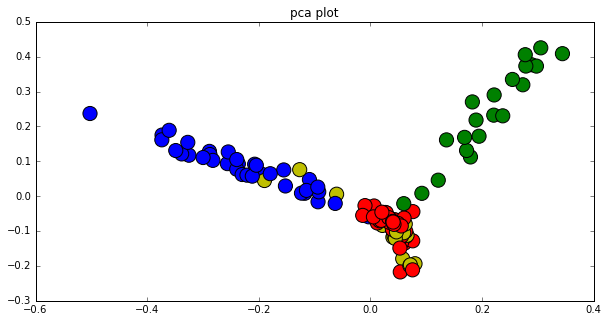

In [170]:
fig, axes = plt.subplots(ncols=1, nrows=1,figsize=(10,5))
axes.scatter(pca_data[:,0], pca_data[:,1], c=['rgbyc'[i] for i in k_data ], s=200)
axes.set_title('pca plot')

In [189]:
for idx, clusterid in enumerate(k_data):
    if clusterid == 3:
        print idx, clusterid , ary[idx]

2 3 希臘國內三分一自動櫃員機現金短缺
5 3 基改不算真食物  法國人知情就不買
7 3 女子世界盃足球賽  日擊敗澳洲晉4強
8 3 《農民曆小幫手》國曆六月二十八日
12 3 歐元區財長拒希臘延長救助計劃
17 3 挪威「行動大雕」出沒 隨機射路人
23 3 2015空姐夏裝大盤點
24 3 呂紹煒專欄：違約與退出 希臘與歐洲才能重生(上)
27 3 觀點投書：何謂新兵訓練
28 3 觀點投書：災難中的護理人
31 3 中俄美競造5音速機彈
36 3 蘇塞大屠殺 凶手畫面曝光
37 3 希臘違約在即  歐盟全力穩定經濟
39 3 希臘脫歐變可能 歐洲衝擊大
42 3 希債協議  法國願盡最後斡旋努力
43 3 挑選新鮮食物 大有學問
45 3 夏天吃什麼好 紅棗、苦瓜攏總來
46 3 補鈣能手大比拚 牛奶吸收效果好
47 3 暑假應考季 小心體內酸鹼失衡
48 3 水果中的皇后 草莓多食好處多
50 3 古人愛西瓜 清明上河圖可佐證
51 3 旺報觀點－紀念抗戰 台日中獲和解轉機
52 3 陸官淪陪酒郎 2年10起醉死案
53 3 慈禧愛西瓜盅 一天可吃數十個
55 3 多位台老兵 受邀赴陸閱兵
57 3 首例 馬頒紀念章給新四軍老兵
58 3 陸改革遇5瓶頸 難以落實基層
59 3 金蟬花替代蟲草 浙民服用中毒
60 3 鄭弘儀反紀念抗戰 陸批數典忘祖
61 3 《經濟教室》白居易、蘇東坡看加薪
62 3 大陸》A股紅火 中資想回家
63 3 大陸》華人赴美置產不手軟
64 3 北美》線上貸款業搶飯碗
65 3 北美》加州光熱發電受挫
66 3 歐洲》高貴的徵才條件
67 3 東北亞》大眾運輸費變貴了
68 3 歐洲》荷蘭的稻田發電
69 3 一周大事－6月21日至27日
72 3 中間選民為洪秀柱按讚
73 3 學生心態M化 台大有責任
74 3 莫忘來時路／6月28日－先上車後補票成歷史
75 3 短評－柯P 去上海吧
76 3 花蓮民宅火警 1男嗆昏送醫
77 3 新生代性感女神降臨　男粉絲擠爆簽書會
79 3 競選總部入厝　洪慈庸期許台中煥然一新
80 3 超商父親節早鳥預購開跑　聶永真設計商品再次收藏
82 3 希臘1／3提款機錢被提光
83 3 八里爆炸意外衛生局凌晨公布314名傷患名單 分送27
84 3 確保銀行穩定 希臘續與ECB緊密合作